__Input Data__:

We have data on the trends in paid subscription purchases in a mobile app from March to October 2018. On October 1, 2018, a new version of the app was released, and from October 10 to 12, users had the option to subscribe at a discounted rate.

__Task__:

Analyze the revenue growth.

---

In [1]:
from datetime import datetime
import calendar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

---

In [3]:
dynamic_purchase = pd.read_excel('results.xlsx', sheet_name=0, names=['date', 'revenue'], parse_dates=['date'])
# dynamic_purchase = pd.read_excel('results.xlsx', sheet_name=0, names=['date', 'revenue'], dtype={'date': 'datetime64[ns]'})

In [4]:
# Let's ensure that the data is filtered for the correct period (March-October 2018).
dynamic_purchase = dynamic_purchase[
    (dynamic_purchase['date'].dt.year == 2018) &
    (dynamic_purchase['date'].dt.month >= 3) &
    (dynamic_purchase['date'].dt.month <= 10)
]

# Let's also sort the rows by date (in case the data is not in order).
dynamic_purchase.sort_values(by='date', inplace=True)

In [5]:
dynamic_purchase['month'] = dynamic_purchase['date'].apply(lambda x: calendar.month_name[x.month])

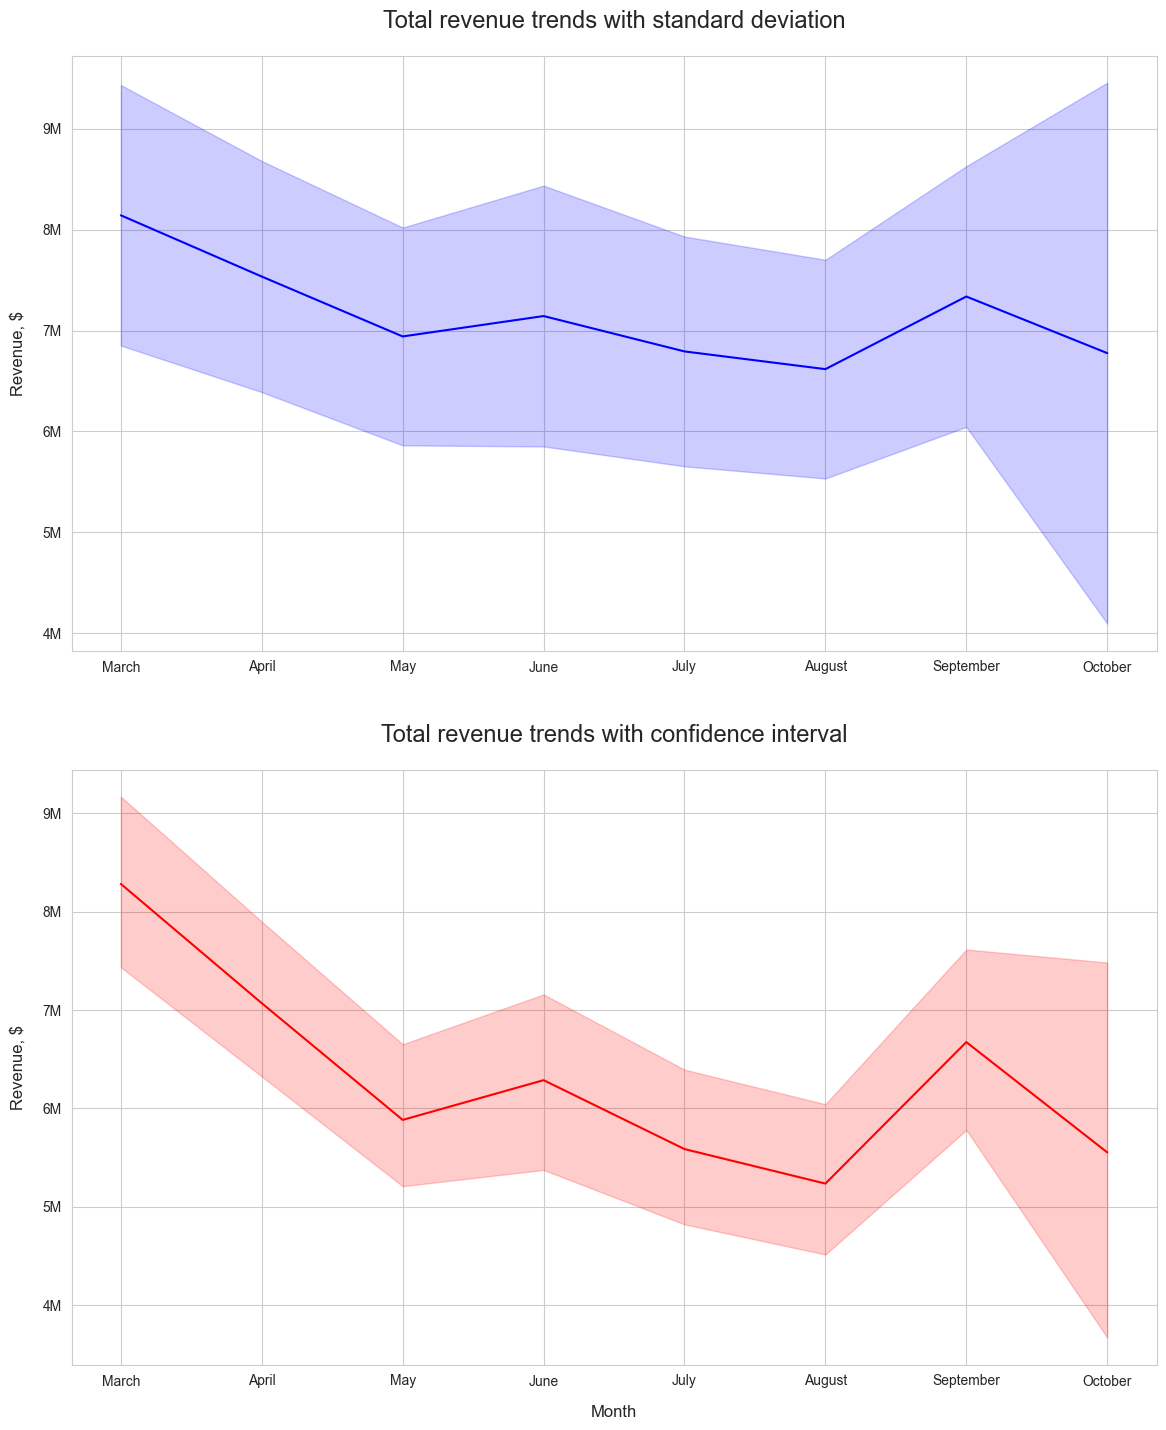

In [6]:
fig = plt.figure(figsize=(14, 17))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# sns.despine()

sns.lineplot(data=dynamic_purchase, x='month', y='revenue', errorbar='sd', ax=ax1, color='blue')
sns.lineplot(data=dynamic_purchase, x='month', y='revenue', errorbar=('ci', 95), ax=ax2, color='red')

from matplotlib.ticker import FixedLocator
ax1.yaxis.set_major_locator(FixedLocator(ax1.get_yticks().tolist()))
ax1.set_yticklabels([f'{i}M' for i in range(3, 11)])
ax2.yaxis.set_major_locator(FixedLocator(ax2.get_yticks().tolist()))
ax2.set_yticklabels([f'{i}M' for i in range(3, 11)])

ax1.set_xlabel('', labelpad=12, fontsize=12)
ax1.set_ylabel('Revenue, $', labelpad=12, fontsize=12)
ax2.set_xlabel('Month', labelpad=12, fontsize=12)
ax2.set_ylabel('Revenue, $', labelpad=12, fontsize=12)

ax1.set_title('Total revenue trends with standard deviation', pad=20, fontsize=17)
ax2.set_title('Total revenue trends with confidence interval', pad=20, fontsize=17);

Looking at the two charts showing revenue trends from March to October 2018, here’s what we can gather:

- The first chart, which displays the average monthly revenue with its standard deviation, clearly shows that March had the highest revenue. After March, revenue generally declined, with small increases in June and September. August, however, marked the lowest point. The noticeable variability in some months, as indicated by a wide standard deviation, suggests that factors like seasonality, market fluctuations, or events such as the app update and discount promotions may have played a role.

- The second chart, featuring 95% confidence intervals, reinforces this observation. The intervals for April through October hardly overlap with that of March, confirming that the decline in revenue is statistically significant.

In short, after a peak in March, revenue dropped – reaching its lowest in August – and then partially bounced back in September and October, likely influenced by seasonal trends, the new app version, and promotional activities.

---

In [7]:
# Calculation of average monthly revenue
purchase_mean = dynamic_purchase.groupby('month', as_index=False, sort=False) \
                                .agg({'revenue': 'mean'}) \
                                .rename(columns={'revenue': 'mean_revenue'})

In [8]:
# Functions for calculating key revenue analysis metrics

# Calculation of the chained/basis increase, where y2 is the current month’s value and y1 is the previous (or baseline) value
increment = lambda y1, y2: round(y2 - y1, 2)

# Calculation of the chained/basis growth rate
growth_rate = lambda y1, y2: round((y2 / y1) * 100, 2)

# Calculation of the chained/basis increment rate
increment_rate = lambda y1, y2: growth_rate(y1, y2) - 100


# Calculation of the average growth rate, where n is the number of months, yn is the current month’s value, and y0 is the base value
mean_growth_rate = lambda n, y0, yn: round(pow((yn / y0), (1 / (n - 1))), 2) * 100
    
# Calculation of the average increment rate
mean_increment_rate = lambda n, y0, yn: mean_growth_rate(n, y0, yn) - 100

In [9]:
# Finally, perform the overall parameter calculations
pd.DataFrame({'period': [calendar.month_name[i] for i in range(4, 11)], 
              'chain_increment rate': [increment_rate(purchase_mean['mean_revenue'].values[i], purchase_mean['mean_revenue'].values[i + 1]) for i in range(7)],
              'basic_increment rate': [increment_rate(purchase_mean['mean_revenue'].values[0], purchase_mean['mean_revenue'].values[i]) for i in range(1, 8)]})

,period,chain_increment rate,basic_increment rate
0,April,-7.45,-7.45
1,May,-7.87,-14.74
2,June,2.91,-12.26
3,July,-4.91,-16.56
4,August,-2.58,-18.72
5,September,10.87,-9.88
6,October,-7.64,-16.77


Our calculations confirm that revenue during this period dropped by 17% compared to March. We only saw growth in June and September.​

---

In [10]:
new_version = (dynamic_purchase.loc[dynamic_purchase['date'].dt.month == 10])[['date', 'revenue']]
new_version['date'] = new_version['date'].apply(lambda x: x.day)
discont = (dynamic_purchase[(dynamic_purchase.date >= datetime(2018, 10, 10)) & (dynamic_purchase.date <= datetime(2018, 10, 12))])[['date', 'revenue']]
discont['date'] = discont['date'].apply(lambda x: x.day)

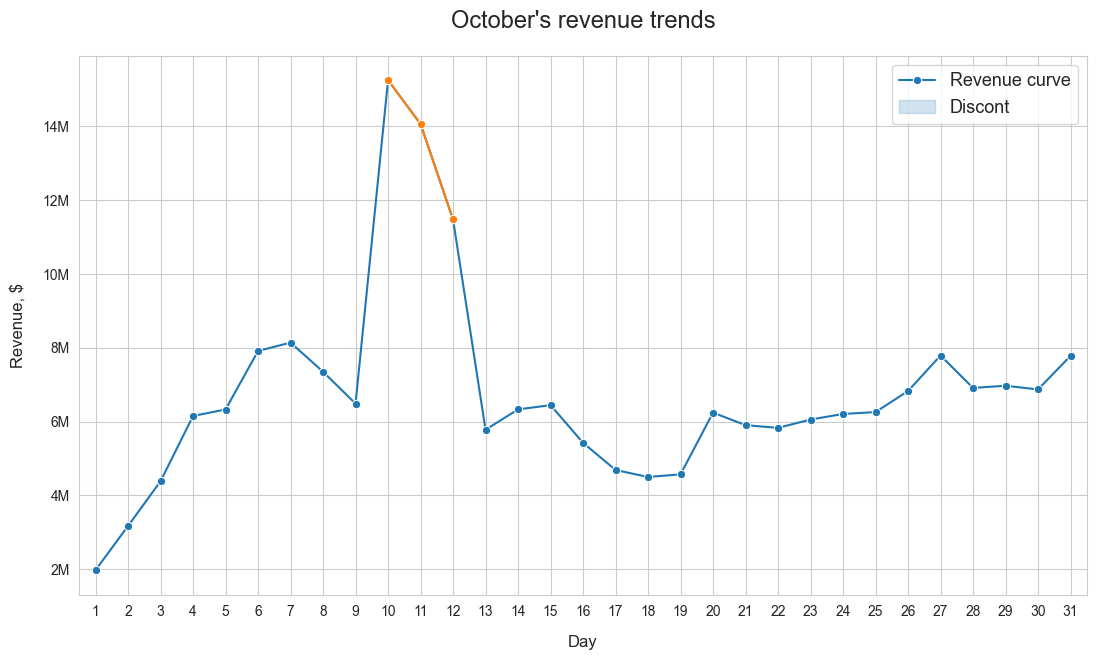

In [11]:
fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot()

# sns.despine()

sns.lineplot(data=new_version, x='date', y='revenue', marker='o')
sns.lineplot(data=discont, x='date', y='revenue', marker='o')

from matplotlib.ticker import FixedLocator, MultipleLocator
ax.yaxis.set_major_locator(FixedLocator(ax.get_yticks().tolist()))
ax.set_yticklabels([f'{i}M' for i in range(0, 17, 2)])
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_xlim(xmin=0.5, xmax=31.5)

plt.xlabel('Day', labelpad=12, fontsize=12)
plt.ylabel('Revenue, $', labelpad=12, fontsize=12)

plt.legend(['Revenue curve', 'Discont'], fontsize=13)

plt.title("October's revenue trends", pad=20, fontsize=17);

The new app version might have been released to help boost revenue, and it did seem to drive some growth. The discounted subscription offer also had a big impact, causing a sharp spike in revenue from October 10 to 12 – the highest during the March-October period. But once the promotion ended, revenue dropped quickly and then leveled out.